In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [13]:
num_epochs = 5;
batch_size = 100;
learning_rate = 0.001;

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


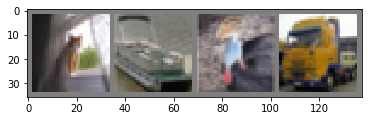

  cat  ship  bird truck


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Traceback (most recent call last):
  File "C:\Users\lasse\.conda\envs\pytorch\lib\multiprocessing\queues.py", line 230, in _feed
    close()
  File "C:\Users\lasse\.conda\envs\pytorch\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\lasse\.conda\envs\pytorch\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid


In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
       
        inputs, labels = data[0].to(device), data[1].to(device)
        print(inputs, labels)
        break
#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

print('Finished Training')

tensor([[[[ 0.4118,  0.4431,  0.4196,  ...,  0.2235,  0.2157,  0.1922],
          [ 0.3647,  0.3333,  0.3569,  ...,  0.1922,  0.2941,  0.3176],
          [ 0.2706,  0.3020,  0.3647,  ...,  0.2392,  0.3333,  0.3098],
          ...,
          [-0.4667, -0.5608, -0.5765,  ..., -0.0431, -0.0275, -0.1294],
          [-0.4980, -0.6078, -0.5922,  ..., -0.1294, -0.1294, -0.1608],
          [-0.5373, -0.6314, -0.6157,  ..., -0.1608, -0.1137, -0.1294]],

         [[ 0.3569,  0.3804,  0.3412,  ...,  0.1294,  0.1294,  0.0980],
          [ 0.3020,  0.2706,  0.2627,  ...,  0.0667,  0.1686,  0.2000],
          [ 0.2000,  0.2157,  0.2471,  ...,  0.0902,  0.1686,  0.1686],
          ...,
          [-0.5529, -0.6157, -0.6392,  ..., -0.1451, -0.1294, -0.2000],
          [-0.5765, -0.6471, -0.6235,  ..., -0.2235, -0.2000, -0.2157],
          [-0.6157, -0.6706, -0.6549,  ..., -0.2471, -0.2000, -0.2000]],

         [[ 0.1529,  0.1686,  0.1373,  ..., -0.0588, -0.0824, -0.1373],
          [ 0.0980,  0.0667,  